In [1]:
using Jacobi
using PyPlot

In [2]:
ϕ₁(x, a, b)  = (b-x)/(b-a)
ϕ₂(x, a, b)  = (x-a)/(b-a)
dϕ₁(x, a, b)  = 1/(a-b)
dϕ₂(x, a, b)  = 1/(b-a)
mass_matrix(a, b) = [(b-a)/3 (b-a)/6; (b-a)/6 (b-a)/3]
stiff_matrix(a, b)= [1/(b-a) -1/(b-a);-1/(b-a) 1/(b-a) ]


#wolfram problem : y'' + y = -4*pi^2*cos(2*pi*x) + cos(2*pi*x),y(-1) = 1,y(1)=1

#fun(x) = (1.0 - 4*pi^2)* cos(2*pi*x)
#resp(x) =  cos(2*pi*x)

resp(x) = sin(2*pi*x)
dresp(x)= 2*pi*cos(2*pi*x)
fun(x)  = (1- 4*pi^2)*sin(2*pi*x)

resp_dir = [resp(-1) resp(1)]

function test(Nel)
    a = -1.0
    b = 1.0
    Ndof = Nel + 1
    xn = [linspace(a,b,Nel+1);];
    idx = 2:Ndof-1
    i_dirich = [1 Ndof]
    dof_map = zeros(Int, 2, Nel)
    for i = 1:Nel
      dof_map[1,i] = i
      dof_map[2,i] = i+1
    end

    #calcula dM
    dl = zeros(Ndof-1)
    dp = zeros(Ndof)

    ##
    for e = 1:Nel
      dMe = stiff_matrix(xn[e], xn[e+1])
      Me = mass_matrix(xn[e], xn[e+1])
      for i = 1:2
          ig = dof_map[i,e]
          for k = 1:2
              kg = dof_map[k,e]
              if kg == ig #principal
                  dp[kg] += -dMe[k,i] + Me[k,i]
              end
              if kg == ig + 1 && kg > 1#low
                  dl[kg-1] += -dMe[k,i] + Me[k,i]
              end
          end
      end
    end
    dp[i_dirich] = 10^10 
    Tri_dM = SymTridiagonal(dp,dl) 

    #calcula F
    fe = fun(xn);
    F = zeros(Ndof)
    for e = 1:Nel
        Me = mass_matrix(xn[e], xn[e+1])
        Fe = Me * fun(xn[e:(e+1)])
        for i = 1:2
            ig = dof_map[i,e]
            F[ig] += Fe[i]
        end
    end

    F = F
    F[i_dirich] = 10^10 * resp_dir
    #Solução
    u = Tri_dM\F

    #calcula erro
    e1 = u - resp(xn)

    return maxabs(e1)
end


test (generic function with 1 method)

/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axis.py:1015: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axis.py:1025: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


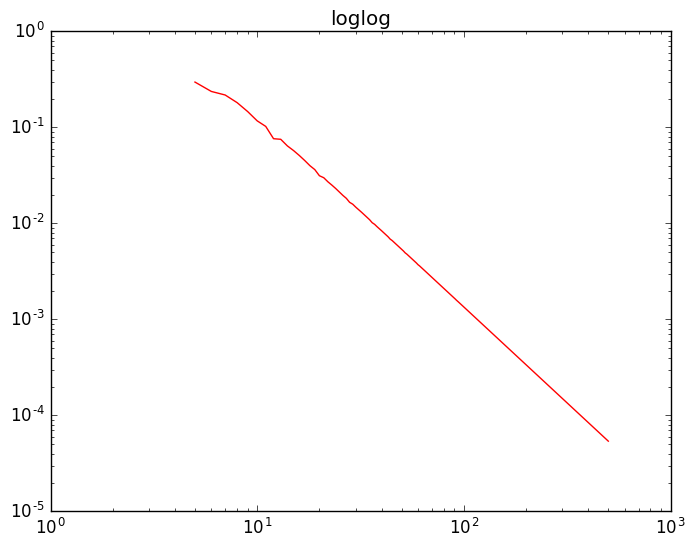

PyObject <matplotlib.text.Text object at 0x7f076e25db10>

In [3]:
n =5:500 # linspace(5,500,495)
erros = Float64[test(Nel) for Nel in n]
#loglog(n,erros)
#title("erro de Nel in $n")
n2 = Float64[n;];
loglog(n2,erros,"r")
title("loglog")

In [4]:
using CurveFit
power_fit(n2,erros)

LoadError: LoadError: ArgumentError: CurveFit not found in path
while loading In[4], in expression starting on line 1

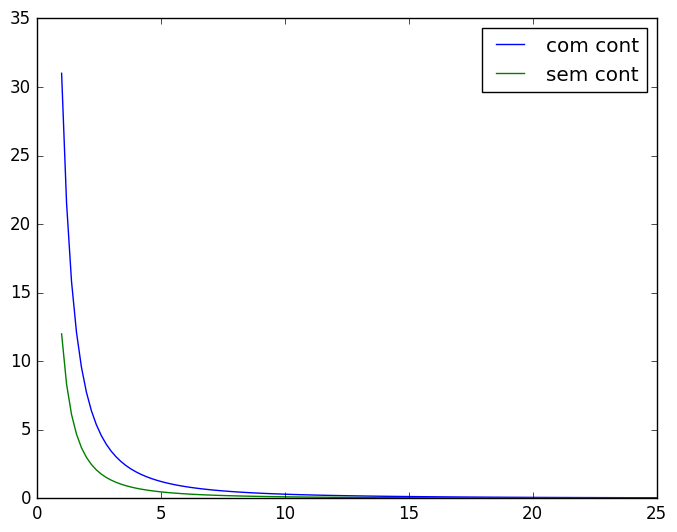

PyObject <matplotlib.legend.Legend object at 0x7f076ded4ed0>

In [5]:
fun1(x)=31*x.^(-2)
fun2(x)= 12*x.^(-2)
x2 = [1:0.2:25;]

plot(x2,[fun1(x2) for x2 in x2],label="com cont")
plot(x2,[fun2(x2) for x2 in x2],label="sem cont")
legend()

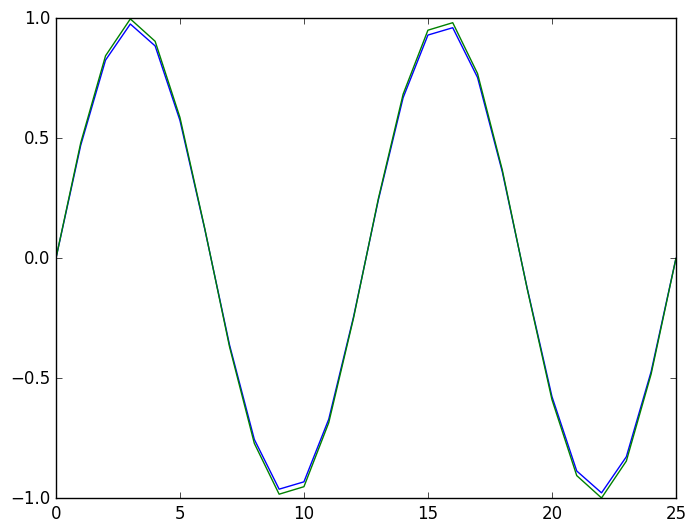

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f076d6ea810>

In [15]:
ϕ₁(x, a, b)  = (b-x)/(b-a)
ϕ₂(x, a, b)  = (x-a)/(b-a)
dϕ₁(x, a, b)  = 1/(a-b)
dϕ₂(x, a, b)  = 1/(b-a)
mass_matrix(a, b) = [(b-a)/3 (b-a)/6; (b-a)/6 (b-a)/3]
stiff_matrix(a, b)= [1/(b-a) -1/(b-a);-1/(b-a) 1/(b-a) ]


#wolfram problem : y'' + y = -4*pi^2*cos(2*pi*x) + cos(2*pi*x),y(-1) = 1,y(1)=1

#fun(x) = (1.0 - 4*pi^2)* cos(2*pi*x)
#resp(x) =  cos(2*pi*x)

resp(x) = sin(2*pi*x)
dresp(x)= 2*pi*cos(2*pi*x)
fun(x)  = (1. - 4*pi^2)*sin(2*pi*x)

resp_dir = [resp(-1) resp(1)]

Nel = 25

a = -1.0
b = 1.0
Ndof = Nel + 1
xn = [linspace(a,b,Nel+1);];
idx = 2:Ndof-1
i_dirich = [1 Ndof]
dof_map = zeros(Int, 2, Nel)
for i = 1:Nel
  dof_map[1,i] = i
  dof_map[2,i] = i+1
end

#calcula dM
dl = zeros(Ndof-1)
dp = zeros(Ndof)

##
for e = 1:Nel
  dMe = stiff_matrix(xn[e], xn[e+1])
  Me = mass_matrix(xn[e], xn[e+1])
  for i = 1:2
      ig = dof_map[i,e]
      for k = 1:2
          kg = dof_map[k,e]
          if kg == ig #principal
              dp[kg] += -dMe[k,i] + Me[k,i]
          end
          if kg == ig + 1 && kg > 1  #low
              dl[kg-1] += -dMe[k,i] + Me[k,i]
          end
      end
  end
end
dp[i_dirich] = 10^10 
Tri_dM = SymTridiagonal(dp,dl) 

#calcula F
fe = fun(xn);
F = zeros(Ndof)
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    Fe = Me * fun(xn[e:(e+1)])
    for i = 1:2
        ig = dof_map[i,e]
        F[ig] += Fe[i]
    end
end

F = F
F[i_dirich] = 10^10 * resp_dir
#Solução
u = Tri_dM\F

#calcula erro
e1 = u - resp(xn)

plot(u)
plot(resp(xn))